# Breast Cancer Detection With ML using KNN and SVM algorithms

### Dataset for this project has been taken from "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"


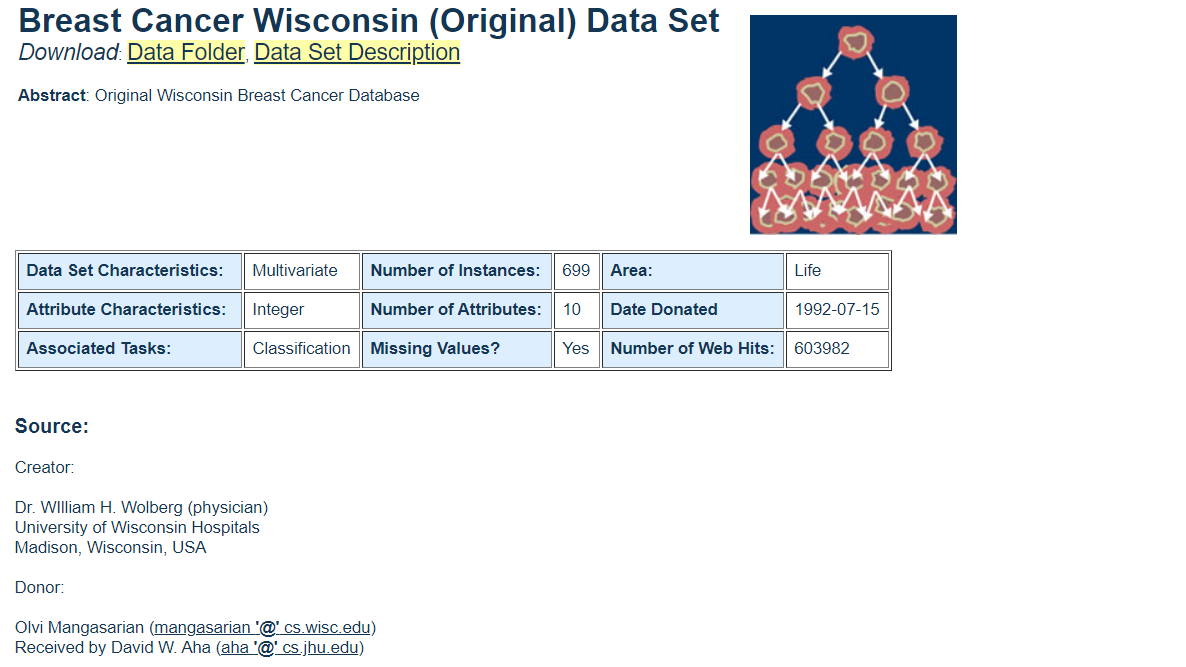

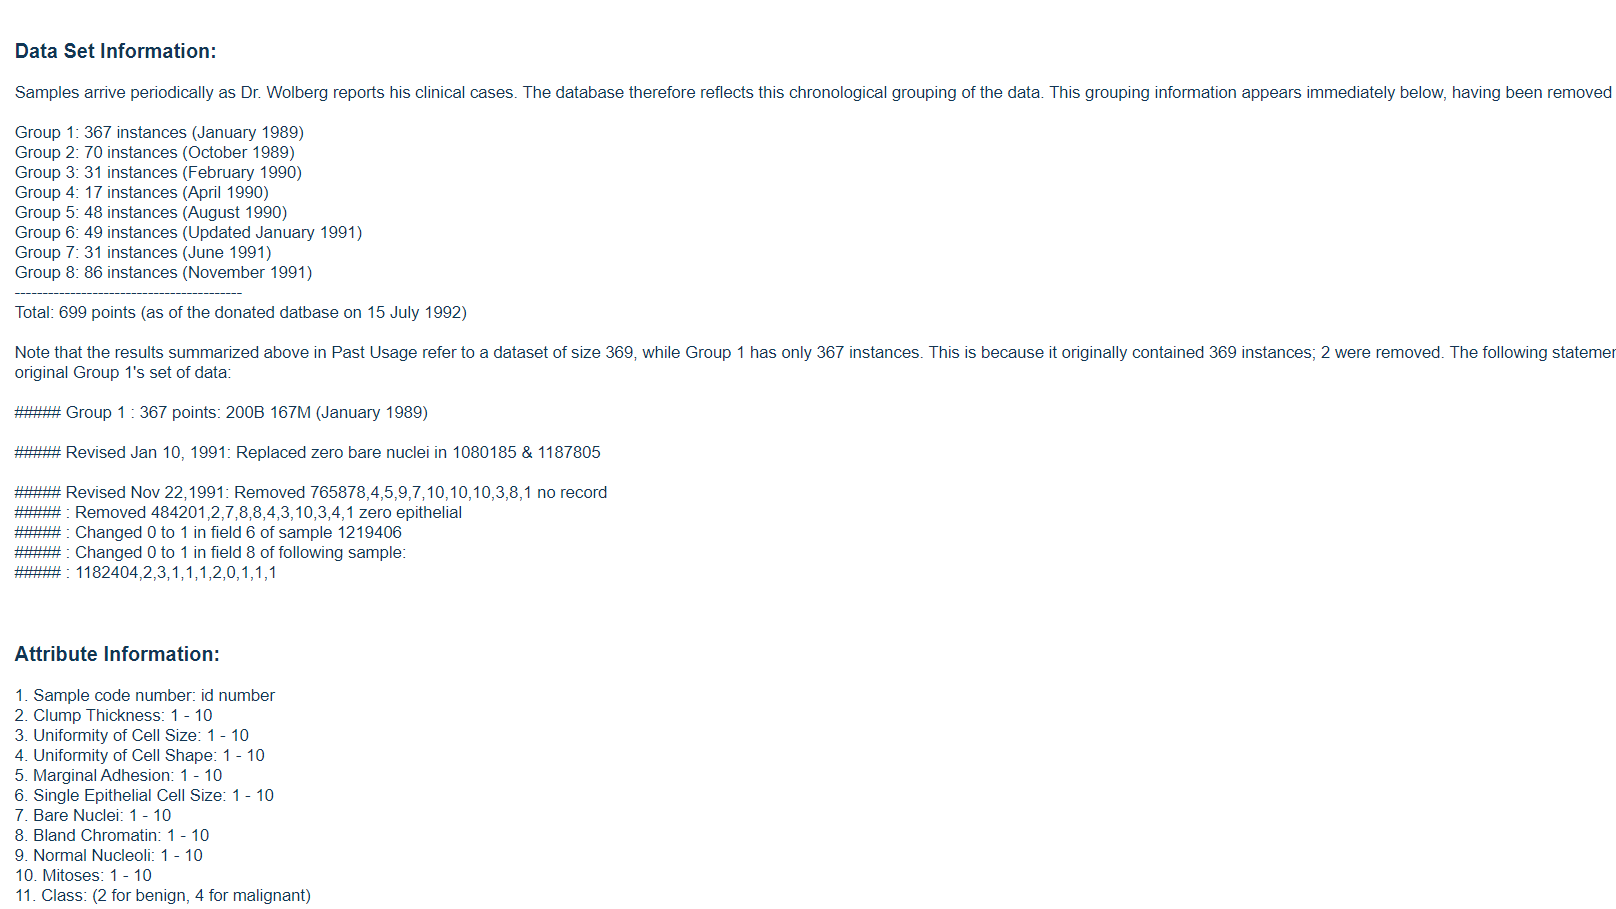# 

In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn
import warnings


print('Python : {}'.format(sys.version))
print('Numpy : {}'.format(numpy.__version__))
print('Pandas : {}'.format(pandas.__version__))
print('Matplotlib : {}'.format(matplotlib.__version__))
print('sklearn : {}'.format(sklearn.__version__))

Python : 3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 22:22:05) [MSC v.1916 64 bit (AMD64)]
Numpy : 1.17.1
Pandas : 0.25.1
Matplotlib : 3.1.1
sklearn : 0.21.3


In [9]:
#used for naming different libraries.
import numpy as np
import pandas as pd

#used for preprocessing of data.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#importing various models.
from sklearn import model_selection  #used for using various model on the same set.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#for accuracy score.
from sklearn.metrics import classification_report,accuracy_score

#for plotting data, and figuring out the stats.
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

print('Import Success!!')

Import Success!!


In [92]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name = ['id','clump_thickness','cell_size_uniformity','cell_shape_uniformity','Marginal_Adhesion','Epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df = pd.read_csv(url,names = name)

In [93]:
#to replace the missing value from the data.
df.replace('?',-99999,inplace = True)
print(df.axes)

#drop the 'id' column.
df.drop(['id'],1,inplace = True)

#for dimensions df.shape
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'Marginal_Adhesion', 'Epithelial_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses',
       'class'],
      dtype='object')]
(699, 10)


In [94]:
#print(df.describe()) = get stats of the dataset
print(df.describe())

       clump_thickness  cell_size_uniformity  cell_shape_uniformity  \
count       699.000000            699.000000             699.000000   
mean          4.417740              3.134478               3.207439   
std           2.815741              3.051459               2.971913   
min           1.000000              1.000000               1.000000   
25%           2.000000              1.000000               1.000000   
50%           4.000000              1.000000               1.000000   
75%           6.000000              5.000000               5.000000   
max          10.000000             10.000000              10.000000   

       Marginal_Adhesion  Epithelial_cell_size  bland_chromatin  \
count         699.000000            699.000000       699.000000   
mean            2.806867              3.216023         3.437768   
std             2.855379              2.214300         2.438364   
min             1.000000              1.000000         1.000000   
25%             1.000000 

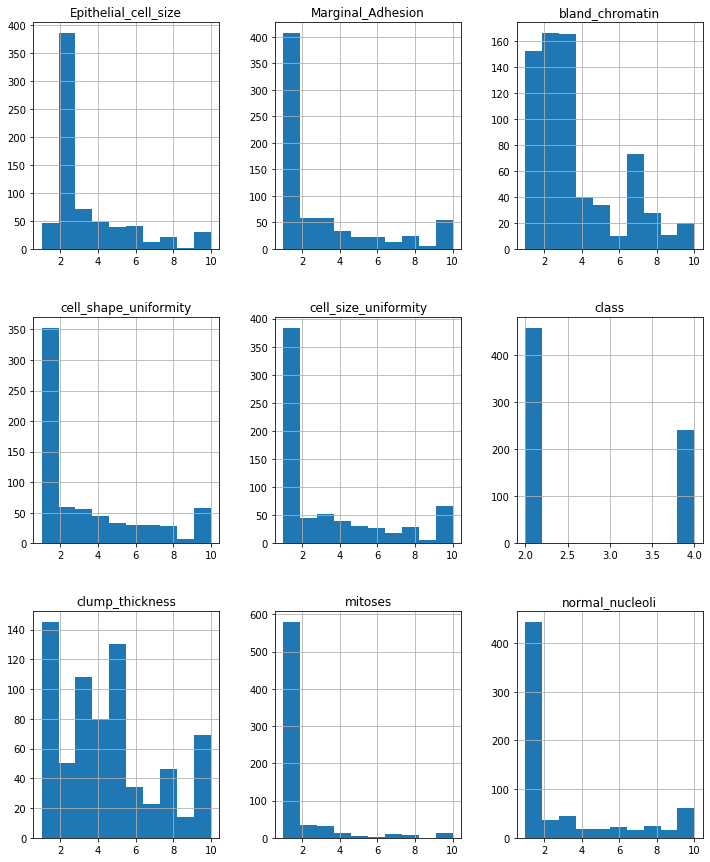

In [95]:
#visual representation of various attributes.
df.hist(figsize = (12,15))
plt.show()

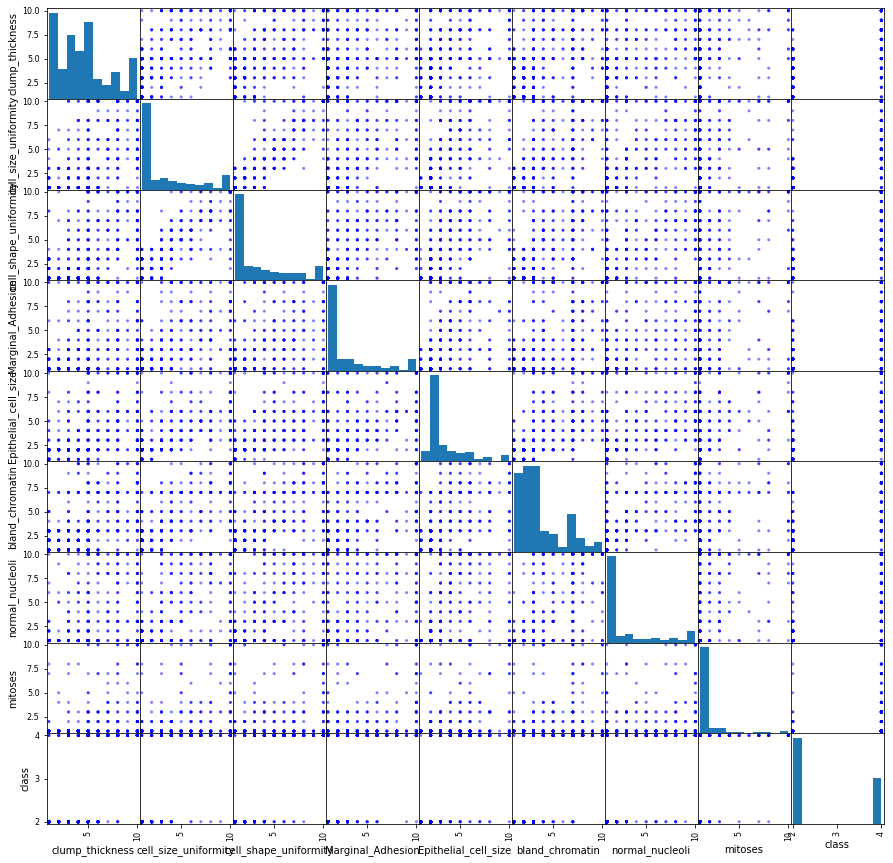

In [96]:
#create a scatter plot matrix
#for inter-relationship between variables or attributes of the dataset.
scatter_matrix(df,figsize = (15,15),c = 'b',hist_kwds = {'color':['tab:blue']})
plt.show()

In [97]:
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity',
       'Marginal_Adhesion', 'Epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [147]:
#cross-validation
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [148]:
#testing parameters
seed = 8 #for keeping const. random_state
scoring = 'accuracy'

In [149]:
#defining models to train
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC()))

#elements of models
for i in models:
    print(i)

('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'))
('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))


In [150]:
#evaluate each model in turn
result = []
names = []

#about kfold cross-validation
#K-Fold is a popular and easy to understand, it generally results in a less biased model compare to other methods.
#Because it ensures that every observation from the original dataset has the chance of appearing in training and test set


for name,model in models:
    #kfold cross-validation is used here, with n-splits = 10 and no shuffling
    #kfold divides dataset in k consecutive folds, with k-1 folds used as training data
    #and the remaining 1 fold is used to validate.
    kfold = model_selection.KFold(n_splits = 10,random_state = seed)
    
    #cross_validation score with model used = model, on X_train,y_train, cv_type = kfold, and
    #scoring criteria = 'accuracy'
    #cv_results is an array with 10 elements. since, in our cross-validation, we have used 
    #10 splits of our current data.
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv = kfold,scoring = scoring)
    result.append(cv_results)
    names.append(name)
    print('{} : {} ({})'.format(name,cv_results.mean(),cv_results.std()))
    print()
print(result)

KNN : 0.969577922077922 (0.025331355262866076)

SVM : 0.9462987012987014 (0.017990763357902135)

[array([0.96428571, 1.        , 1.        , 0.96428571, 0.98214286,
       1.        , 0.92857143, 0.96428571, 0.92857143, 0.96363636]), array([0.96428571, 0.96428571, 0.94642857, 0.96428571, 0.94642857,
       0.96428571, 0.91071429, 0.94642857, 0.92857143, 0.92727273])]


In [151]:
#make prediction on validation dataset
#i.e make prediction for test data

for name,model in models:
    #fit the training data to model on which you are going to work. 
    model.fit(X_train,y_train)
    #take your model's prediction on the testing data from the validation part.
    predictions = model.predict(X_test)
    #accuracy score - how well the model predicted the output.
    #classification report - more diversified report of how well the model performed in reporting the correct output.
    print('{} : {}'.format(name,accuracy_score(y_test,predictions)))
    print()
    print(classification_report(y_test,predictions))

KNN : 0.9785714285714285

              precision    recall  f1-score   support

           2       0.98      0.99      0.98        87
           4       0.98      0.96      0.97        53

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM : 0.9714285714285714

              precision    recall  f1-score   support

           2       1.00      0.95      0.98        87
           4       0.93      1.00      0.96        53

    accuracy                           0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140

